## Instrucciones
    - Carga de datos: Descarga el archivo de datos house_prices.csv que contiene las siguientes columnas:
        - SqFt: Tamaño de la casa en pies cuadrados.
        - Bedrooms: Número de habitaciones.
        - Bathrooms: Número de baños.
        - Price: Precio de venta de la casa.
    - Exploración de datos: Realiza un análisis exploratorio de los datos para entender su estructura y detectar posibles problemas como valores nulos o outliers.
    - Preparación de datos: Divide los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
    - Entrenamiento del modelo: Entrena un modelo de regresión lineal utilizando los datos de entrenamiento.
    - Evaluación del modelo: Evalúa el modelo utilizando el conjunto de prueba. Calcula el error cuadrático medio (MSE) y el R-cuadrado (R²) del modelo.
    - Predicción: Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
        - Tamaño: 2000 pies cuadrados
        - Habitaciones: 3
        - Baños: 2

In [24]:
# Paso 0: Importar las librerias a utilizar
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Paso 1: Cargar el dataset
df = pd.read_csv('../data/house-prices.csv')
print(df.shape)

# Paso 2: Exploración de datos
print("Primeras filas del dataset:")
print(df.head())
print("\n####################################################################################################################################################################")
# Verificación de casos nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\n####################################################################################################################################################################")

# Manejo de valores nulos (si existen)
# df = df.dropna()  # Aquí los eliminamos; alternativamente podrías rellenar con medias o medianas

# Detección de outliers (opcional)
# Aquí puedes usar métodos como boxplots para detectar visualmente valores extremos, pero los omitiremos por simplicidad

# Resumen estadistico
print("Descripción estadística:")
print(df.describe())
print("\n####################################################################################################################################################################")


(128, 8)
Primeras filas del dataset:
   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East

####################################################################################################################################################################

Valores nulos por columna:
Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

####################################################################################################################################################################
Descripción estadística:
 

### Exploración de los datos
Se busca graficar el dataset para interpretar mejor los datos

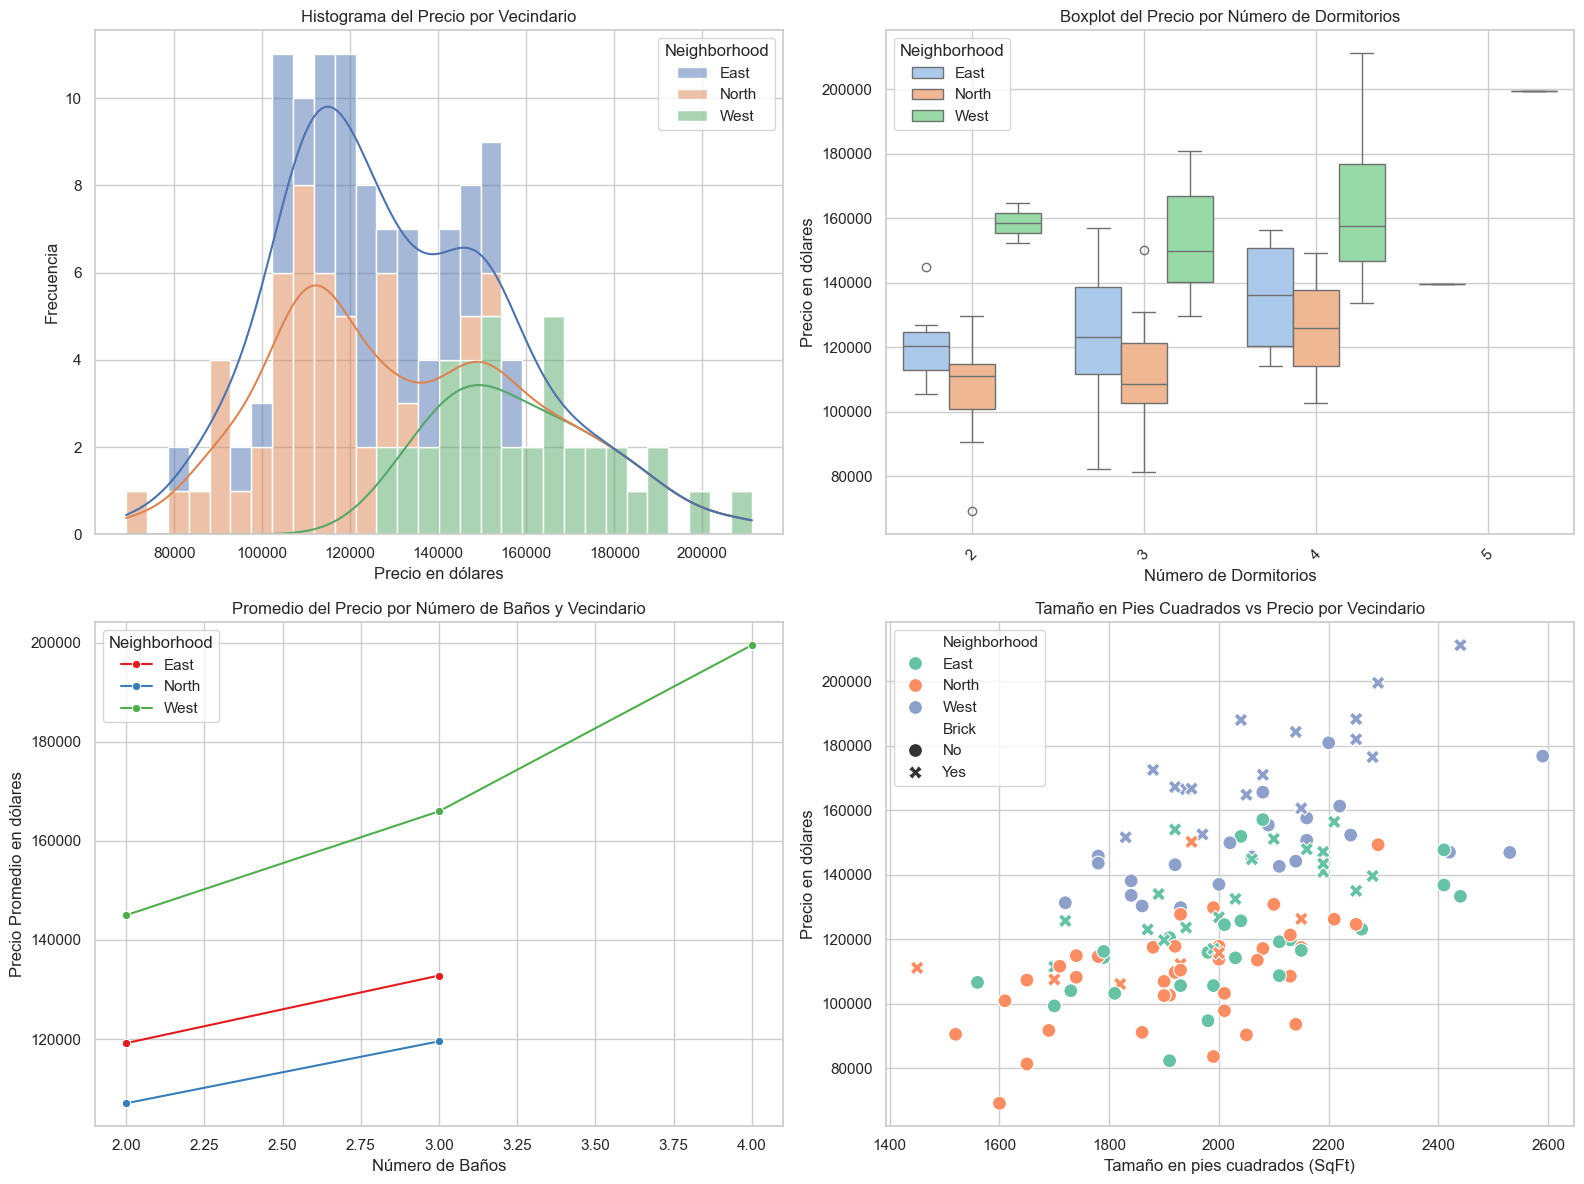

In [26]:
sns.set(style='whitegrid')

# Crear la figura y la cuadrícula de subgráficos
plt.figure(figsize=(16, 12))

# 1. Histograma del precio por vecindario
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Price', hue='Neighborhood', multiple='stack', bins=30, kde=True)
plt.title('Histograma del Precio por Vecindario')
plt.xlabel('Precio en dólares')
plt.ylabel('Frecuencia')
plt.grid(True)

# 2. Boxplot del precio por número de dormitorios
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Bedrooms', y='Price', hue='Neighborhood', palette='pastel', dodge=True)
plt.title('Boxplot del Precio por Número de Dormitorios')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio en dólares')
plt.xticks(rotation=45)
plt.grid(True)

# 3. Gráfico de línea: promedio de precio por número de baños y vecindario
plt.subplot(2, 2, 3)
bathroom_price_means = df.groupby(['Bathrooms', 'Neighborhood'])['Price'].mean().reset_index()
sns.lineplot(data=bathroom_price_means, x='Bathrooms', y='Price', hue='Neighborhood', marker='o', palette='Set1')
plt.title('Promedio del Precio por Número de Baños y Vecindario')
plt.xlabel('Número de Baños')
plt.ylabel('Precio Promedio en dólares')
plt.grid(True)

# 4. Gráfico de dispersión del tamaño en pies cuadrados por precio y vecindario
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='SqFt', y='Price', hue='Neighborhood', style='Brick', s=100, palette='Set2')
plt.title('Tamaño en Pies Cuadrados vs Precio por Vecindario')
plt.xlabel('Tamaño en pies cuadrados (SqFt)')
plt.ylabel('Precio en dólares')
plt.grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

### Preparación de los datos para entrenar el algoritmo

In [27]:
# Paso 3: Preparación de datos: Separar las variables predictoras (X) y la variable objetivo (y)
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Verificar distribución de y y considerar transformación logarítmica si es necesario
if y.skew() > 1 or y.skew() < -1:
    y = np.log1p(y)
    log_transform = True
else:
    log_transform = False

# Dividimos los datos en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar variables predictorias
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Paso 4: Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Error Cuadrático Medio (MSE): 320149938.23
Error Absoluto Medio (MAE): 14768.46
R-cuadrado (R²): 0.46
R² promedio en validación cruzada: 0.38


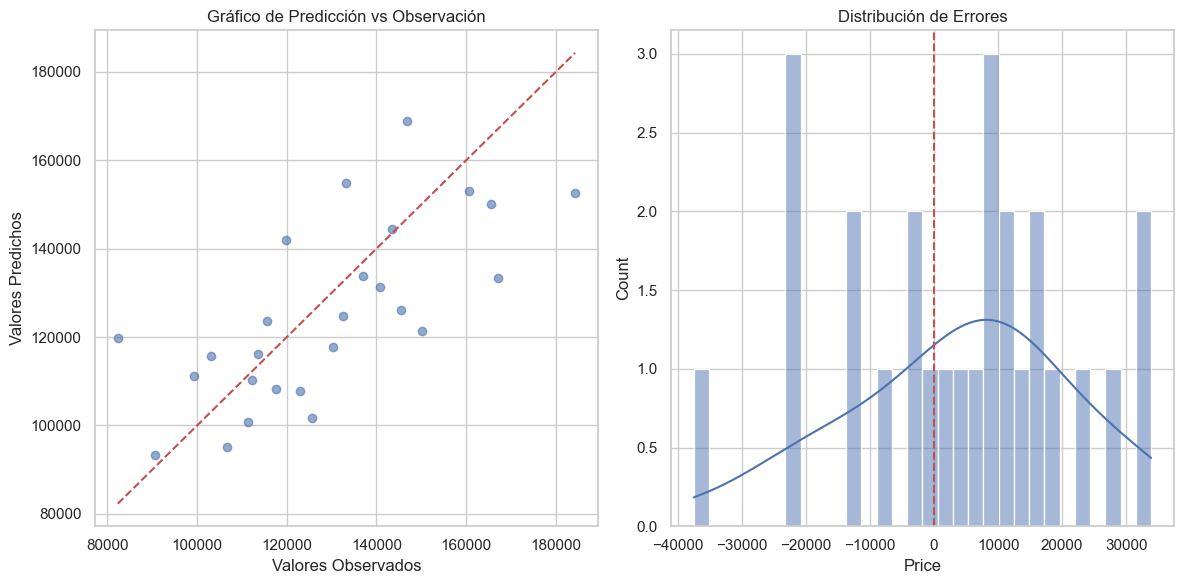

In [29]:
# Paso 5: Evaluación del modelo en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Si se aplicó transformación logarítmica, revertirla para evaluar el rendimiento
if log_transform:
    y_pred = np.expm1(y_pred)
    y_test = np.expm1(y_test)

# Calcular metricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"R-cuadrado (R²): {r2:.2f}")

# Validación cruzada
cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='r2')
print(f"R² promedio en validación cruzada: {np.mean(cv_scores):.2f}")

# Diagnóstico gráfico
plt.figure(figsize=(12, 6))

# Gráfico de residuales
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Observados")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Predicción vs Observación")

# Distribución de errores
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.title("Distribución de Errores")

plt.tight_layout()
plt.show()

In [30]:
# Paso 6: Predicción del precio de una casa con las características especificadas
nueva_casa = pd.DataFrame([[2000, 3, 2]], columns=['SqFt', 'Bedrooms', 'Bathrooms'])
nueva_casa_scaled = scaler.transform(nueva_casa)
prediccion_precio = model.predict(nueva_casa_scaled)

if log_transform:
    prediccion_precio = np.expm1(prediccion_precio)

print(f"\nEl precio estimado para una casa de 2000 SqFt, 3 habitaciones y 2 baños es: ${prediccion_precio[0]:.2f}")


El precio estimado para una casa de 2000 SqFt, 3 habitaciones y 2 baños es: $123537.00
